In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd

train_df = pd.read_csv('./datasets/titanic_train.csv')

titanic_train_df = train_df[['Pclass' , 'Sex', 'Age' , 'Survived']]

In [8]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
result_train = encoder.fit_transform(titanic_train_df['Sex'])
# print(result)
titanic_train_df['Sex']=result_train

In [15]:


import pandas as pd 
train_df = pd.read_csv("./datasets/titanic_train.csv")
titanic_train_df = train_df[['Pclass' , 'Sex', 'Age' , 'Survived']]
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
titanic_train_df['Sex']=encoder.fit_transform(titanic_train_df['Sex']) #fit_transform하면 변하면서 적용도 한꺼번에 해줌 
titanic_train_df = titanic_train_df.fillna(titanic_train_df['Age'].mean())

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도{accuracy}, 정밀도:{precision}, 재현율:{recall} , f1score : {f1score}')

import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(titanic_train_df[['Pclass' , 'Sex', 'Age']], \
                                                    titanic_train_df['Survived'], test_size=0.2, random_state=10 )

print(y_test.value_counts())

lr_clf= LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

Survived
0    117
1     62
Name: count, dtype: int64
오차 행렬
[[103  14]
 [ 16  46]]
정확도0.8324022346368715, 정밀도:0.7666666666666667, 재현율:0.7419354838709677 , f1score : 0.7540983606557377


In [20]:
pred_proba = lr_clf.predict_proba(X_test)

In [18]:
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [21]:
pred_proba

array([[0.91003707, 0.08996293],
       [0.8719348 , 0.1280652 ],
       [0.88860201, 0.11139799],
       [0.16591157, 0.83408843],
       [0.09779659, 0.90220341],
       [0.86895847, 0.13104153],
       [0.88596237, 0.11403763],
       [0.82746927, 0.17253073],
       [0.90334051, 0.09665949],
       [0.87771457, 0.12228543],
       [0.72851968, 0.27148032],
       [0.11883148, 0.88116852],
       [0.1901147 , 0.8098853 ],
       [0.51203098, 0.48796902],
       [0.74889011, 0.25110989],
       [0.75234424, 0.24765576],
       [0.89790635, 0.10209365],
       [0.81695748, 0.18304252],
       [0.41099591, 0.58900409],
       [0.89790635, 0.10209365],
       [0.89790635, 0.10209365],
       [0.78201723, 0.21798277],
       [0.24369356, 0.75630644],
       [0.88596237, 0.11403763],
       [0.84298763, 0.15701237],
       [0.8719348 , 0.1280652 ],
       [0.8719348 , 0.1280652 ],
       [0.3474712 , 0.6525288 ],
       [0.84550435, 0.15449565],
       [0.10500898, 0.89499102],
       [0.

In [24]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict
get_clf_eval(y_test, custom_predict)

오차 행렬
[[103  14]
 [ 16  46]]
정확도0.8324022346368715, 정밀도:0.7666666666666667, 재현율:0.7419354838709677 , f1score : 0.7540983606557377


In [35]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict
get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 20]
 [11 51]]
정확도0.8268156424581006, 정밀도:0.7183098591549296, 재현율:0.8225806451612904 , f1score : 0.7669172932330828


In [36]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 :  0.4
오차 행렬
[[97 20]
 [11 51]]
정확도0.8268156424581006, 정밀도:0.7183098591549296, 재현율:0.8225806451612904 , f1score : 0.7669172932330828
임계값 :  0.45
오차 행렬
[[97 20]
 [13 49]]
정확도0.8156424581005587, 정밀도:0.7101449275362319, 재현율:0.7903225806451613 , f1score : 0.7480916030534351
임계값 :  0.5
오차 행렬
[[103  14]
 [ 16  46]]
정확도0.8324022346368715, 정밀도:0.7666666666666667, 재현율:0.7419354838709677 , f1score : 0.7540983606557377
임계값 :  0.55
오차 행렬
[[103  14]
 [ 18  44]]
정확도0.8212290502793296, 정밀도:0.7586206896551724, 재현율:0.7096774193548387 , f1score : 0.7333333333333333
임계값 :  0.6
오차 행렬
[[114   3]
 [ 23  39]]
정확도0.8547486033519553, 정밀도:0.9285714285714286, 재현율:0.6290322580645161 , f1score : 0.75


In [38]:
from sklearn.metrics import precision_recall_curve

precisions , recalls , thresholds = precision_recall_curve(y_test, pred_proba[:,1])


In [47]:
thresholds

array([0.03410998, 0.04286403, 0.0474107 , 0.04985255, 0.06085967,
       0.0671812 , 0.07231671, 0.07593906, 0.07876434, 0.07972726,
       0.0857337 , 0.08782531, 0.08996293, 0.09104923, 0.09214732,
       0.09437926, 0.09665949, 0.10017209, 0.10209365, 0.10627876,
       0.11139799, 0.11403763, 0.1167316 , 0.11948063, 0.12228543,
       0.12514672, 0.1280652 , 0.12887745, 0.13104153, 0.1340764 ,
       0.14032436, 0.15449565, 0.15701237, 0.17253073, 0.18304252,
       0.18702252, 0.19106881, 0.19219259, 0.19518163, 0.21798277,
       0.22711523, 0.24131383, 0.24617904, 0.24765576, 0.25110989,
       0.27148032, 0.27291748, 0.28204573, 0.29285703, 0.30390733,
       0.31107222, 0.32091337, 0.32249637, 0.32829011, 0.33413659,
       0.36411132, 0.37024411, 0.38263441, 0.38888839, 0.39976284,
       0.41249394, 0.44008086, 0.47281107, 0.48796902, 0.4925804 ,
       0.49917839, 0.51737152, 0.53710579, 0.5534653 , 0.55829889,
       0.55868344, 0.58259996, 0.58900409, 0.5953782 , 0.60954

In [42]:
recalls[21]

0.9354838709677419

In [43]:
thresholds[21]

0.11403762941716501

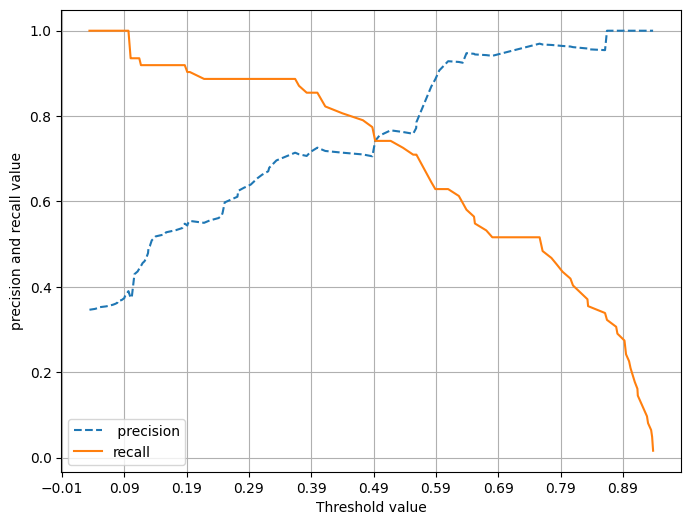

In [48]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker 
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve (y_test,pred_proba_c1)
    
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label =' precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('precision and recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])